Importing AU24FR_WF_Silc.txt
Importing CH12CR_WF_Silc.txt
Importing MK4KE.txt
Importing SA13PE.txt
Distance from Harris Hall to Tobler Museum is 692.0, shortcut is 511.3636364
Efficiency is 0.7389647924855491
Distance from Tobler Museum to Snow Church is 263.0, shortcut is 272.7272727
Efficiency is 1
Distance from Snow Church to Lynch Station is 916.0, shortcut is 875.0
Efficiency is 0.9552401746724891
Distance from Lynch Station to Harvey House is 543.5, shortcut is 515.9090909
Efficiency is 0.9492347578656855
Distance from Harvey House to Saucer Center is 889.0, shortcut is 927.2727273
Efficiency is 1
Distance from Saucer Center to Golledge Hall is 226.0, shortcut is 220.4545455
Efficiency is 0.9754625907079646
Distance from Golledge Hall to Harris Hall is 583.0, shortcut is 577.2727273
Efficiency is 0.9901762046312179
Distance from Harris Hall to Batty House is 372.0, shortcut is 345.4545455
Efficiency is 0.928641251344086


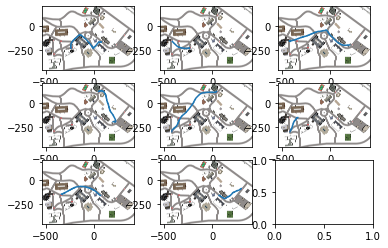

Distance from Harris Hall to Tobler Museum is 649.5, shortcut is 511.3636364
Efficiency is 0.7873189167051579
Distance from Tobler Museum to Snow Church is 278.0, shortcut is 272.7272727
Efficiency is 0.9810333550359712
Distance from Snow Church to Lynch Station is 986.0, shortcut is 875.0
Efficiency is 0.8874239350912779
Distance from Lynch Station to Harvey House is 577.0, shortcut is 515.9090909
Efficiency is 0.8941232077989602
Distance from Harvey House to Saucer Center is 891.0, shortcut is 927.2727273
Efficiency is 1
Distance from Saucer Center to Golledge Hall is 247.0, shortcut is 220.4545455
Efficiency is 0.892528524291498
Distance from Golledge Hall to Harris Hall is 551.0, shortcut is 577.2727273
Efficiency is 1
Distance from Harris Hall to Batty House is 385.0, shortcut is 345.4545455
Efficiency is 0.8972845337662337


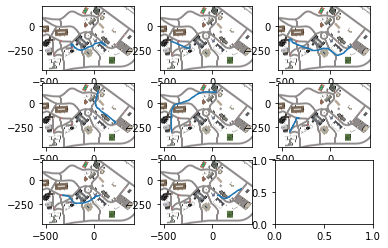

Distance from Harris Hall to Tobler Museum is 1604.0, shortcut is 511.3636364
Efficiency is 0.31880525960099754
Distance from Tobler Museum to Snow Church is 345.0, shortcut is 272.7272727
Efficiency is 0.7905138339130435
Distance from Snow Church to Lynch Station is 1644.0, shortcut is 875.0
Efficiency is 0.5322384428223844
Distance from Lynch Station to Harvey House is 734.0, shortcut is 515.9090909
Efficiency is 0.7028734208446867
Distance from Harvey House to Saucer Center is 895.0, shortcut is 927.2727273
Efficiency is 1
Distance from Saucer Center to Golledge Hall is 275.0, shortcut is 220.4545455
Efficiency is 0.8016528927272727
Distance from Golledge Hall to Harris Hall is 599.0, shortcut is 577.2727273
Efficiency is 0.9637274245409015
Distance from Harris Hall to Batty House is 443.0, shortcut is 345.4545455
Efficiency is 0.7798071004514673


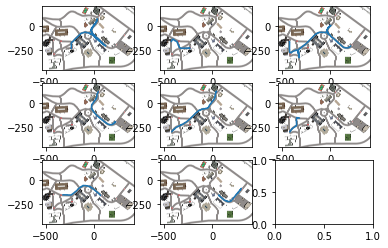

Distance from Harris Hall to Tobler Museum is 2251.0, shortcut is 511.3636364
Efficiency is 0.2271717620613061
Distance from Tobler Museum to Snow Church is 325.0, shortcut is 272.7272727
Efficiency is 0.8391608390769231
Distance from Snow Church to Lynch Station is 1157.0, shortcut is 875.0
Efficiency is 0.756266205704408
Distance from Lynch Station to Harvey House is 772.0, shortcut is 515.9090909
Efficiency is 0.6682760244818653
Distance from Harvey House to Saucer Center is 1028.0, shortcut is 927.2727273
Efficiency is 0.902016271692607
Distance from Saucer Center to Golledge Hall is 332.0, shortcut is 220.4545455
Efficiency is 0.6640197153614458
Distance from Golledge Hall to Harris Hall is 600.0, shortcut is 577.2727273
Efficiency is 0.9621212121666667
Distance from Harris Hall to Batty House is 1229.0, shortcut is 345.4545455
Efficiency is 0.28108587917005695


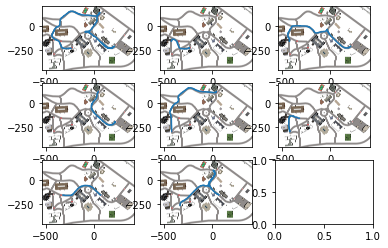

In [1]:
from analysis.wayfinding import Wayfinding
from pathlib import Path
W = Wayfinding()
# Path is where the project folder is
W.import_everything(Path('../'))
W.analyze_all_subject()